# Demystifying Bayesin Data Analysis with PyMC3 ( To be updated...)

 **-Uddipta Bhattacharjee, MTech (Research) Student @Dept. of CSE,<br>
 Indian Institute of Technology(IIT), Hyderabad  -*
<br>
#### Data Hack 2018, Bengaluru, India
    - Main Component: PyMC3 (https://docs.pymc.io/)
    - HTML Notebook on GitHub



## Features of the Talk



 1.**Less Mathematical Complexity ** <br>
      Main focus of the talk is to make you comfortable to use Bayesian inference in your              data analysis task, using PyMC3, without actually implementing the giant formulas.
 <br><br><br>
 2.** Complex Derivations are omiited ** <br>
      In some places, it is inveitable to talk about the Mathematical form of the equations<br>         (i.e.  for of posterior), but deep derivations are omitted in such cases.
 <br><br><br>
 3.** Advancement with Interactive Coding ** <br>
      After every little concept, python (PyMC3) implementation of that topic is provided and           explained in an interactive way, so that users can relate the solution of the problem             with their mathematical understanding of the Topic.
        

## Prior Requirements

- ** Familiarity with **
    - Python Syntaxes
    - Basic Usage of Python Libraries                        
    
<br>
    
- ** Knowledge About **
    - Std Probability Distributions
    - Very basic idea about Parameters
    - Mean, Variance , etc
    - Idea about Prior & Posterior

## A Quick Recap

Courtesy: Eric J Ma's Slides on Bayesian Stat Talks


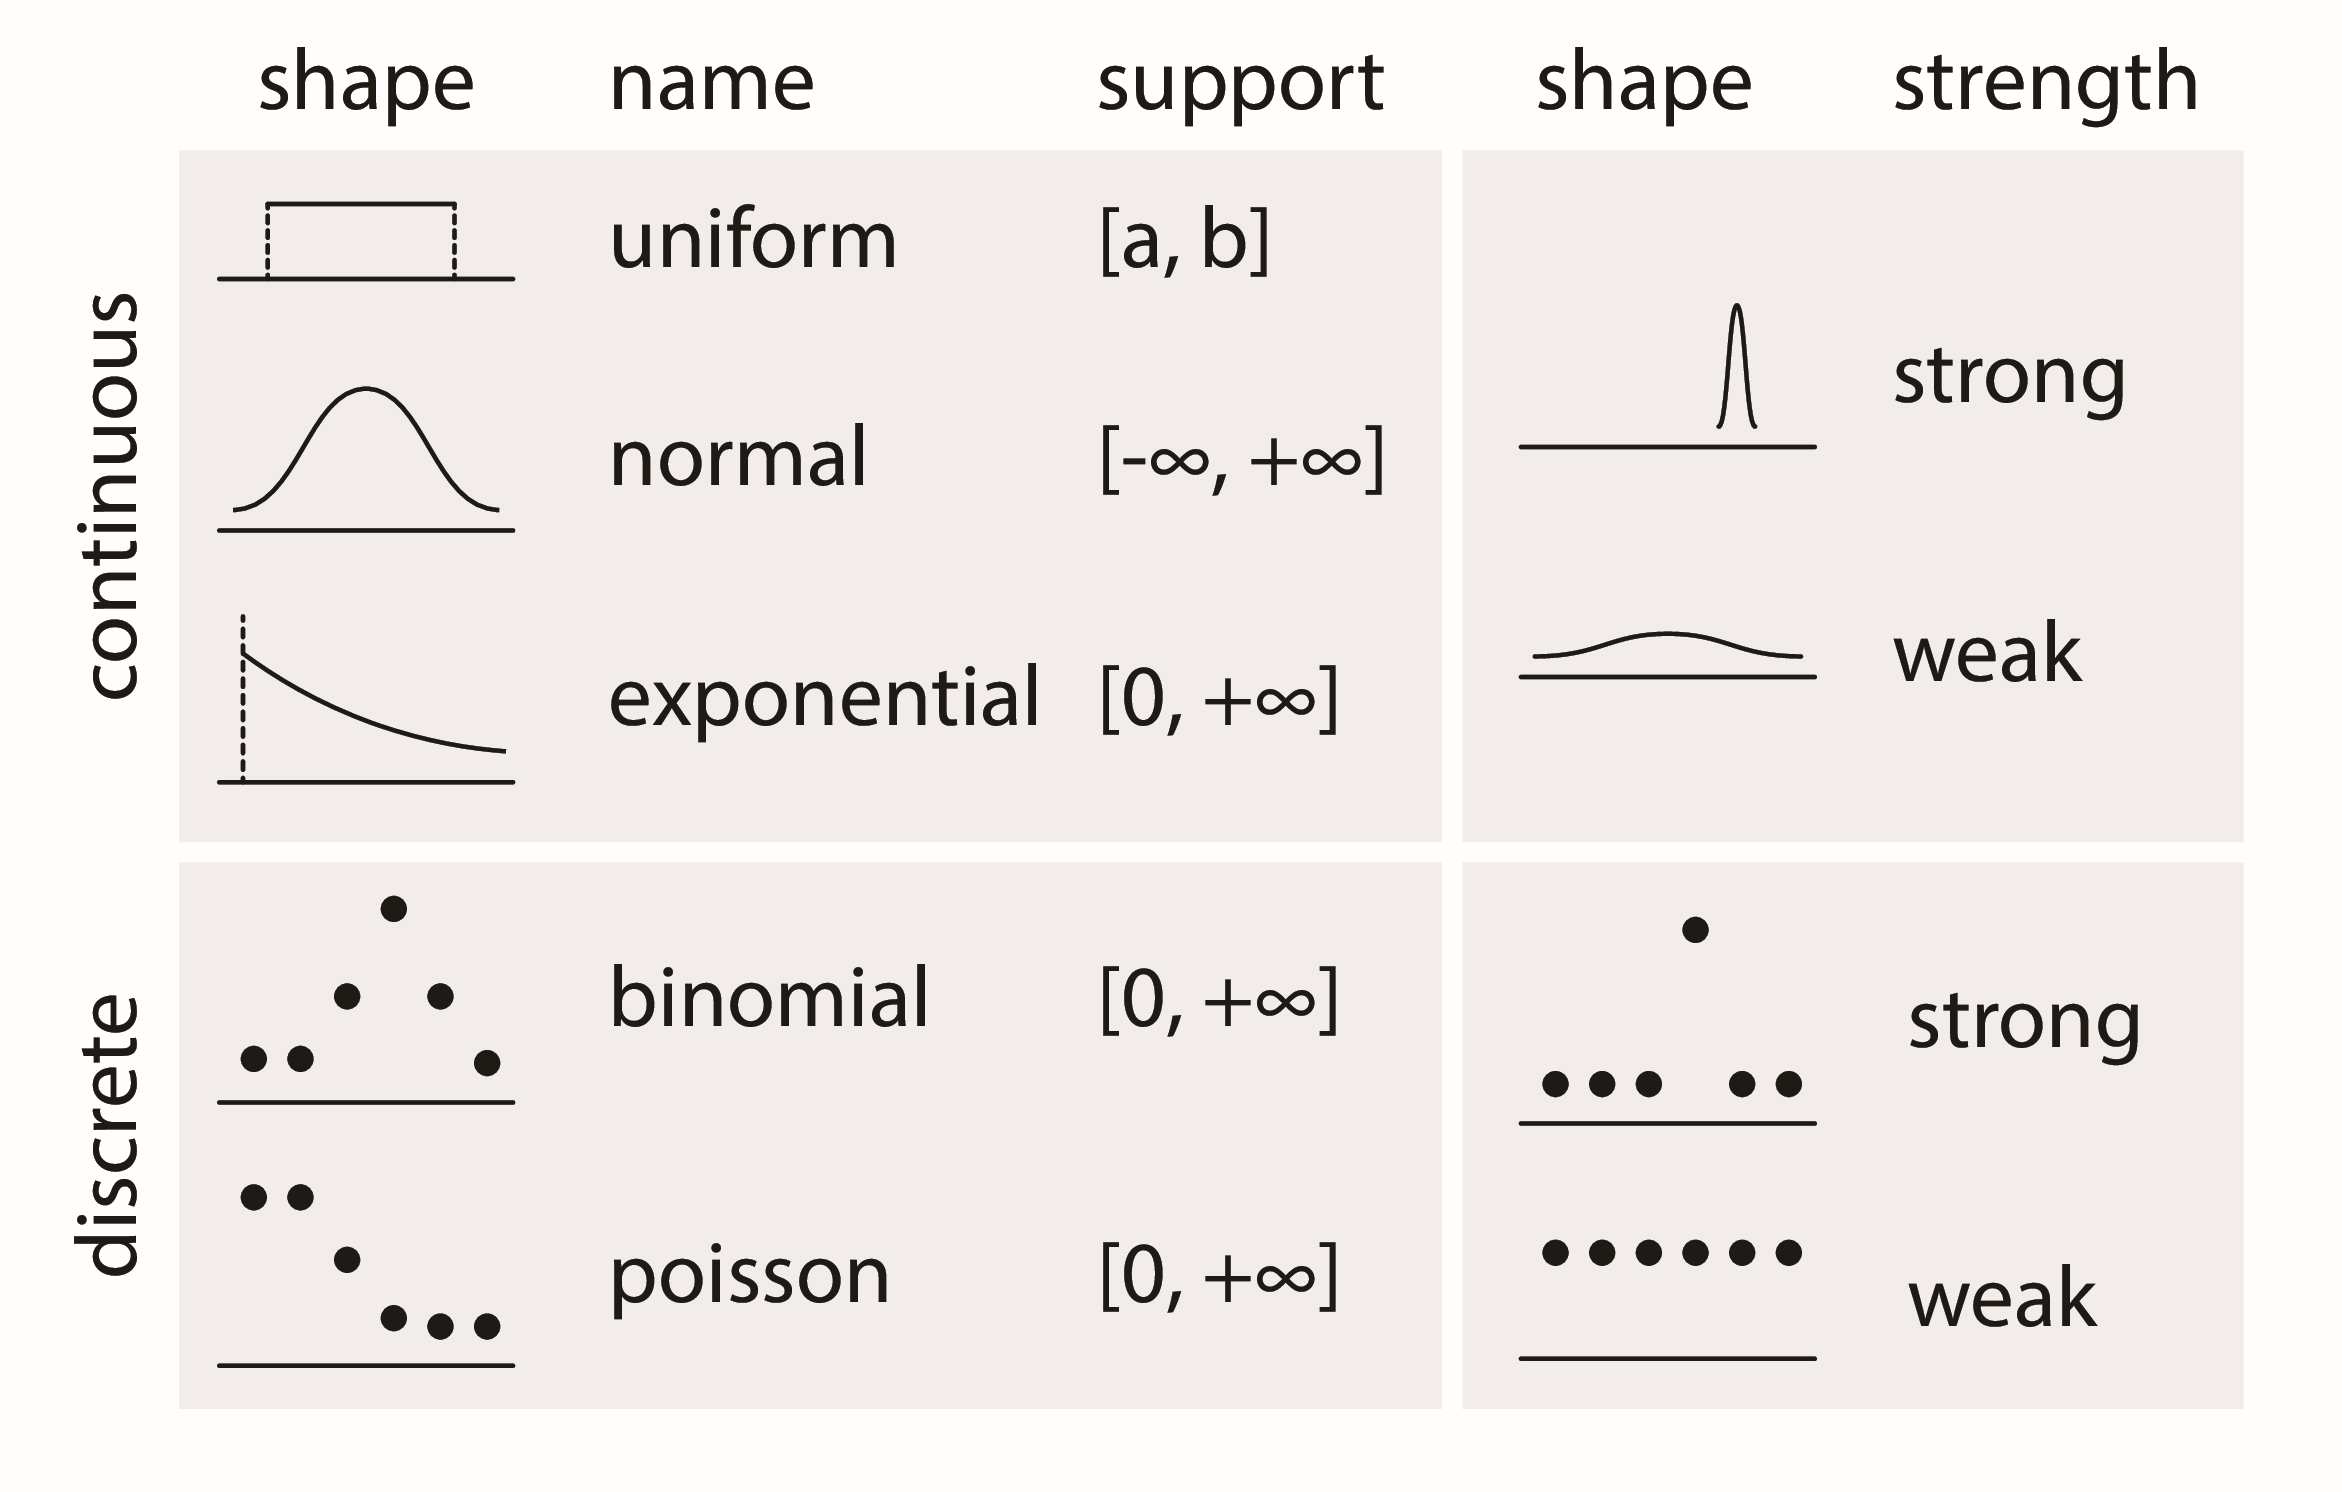

In [41]:
from IPython.display import Image
print("Courtesy: Eric J Ma's Slides on Bayesian Stat Talks")
Image(filename="untitled.png")


## PyMC3 

<img src="image1.png" alt="My Image">

### Purpose

- probabilistic programming module for Python
- allows users to fit Bayesian models using a variety of numerical method.
- MCMC Sampling and Variationa Inference are the most notable features of PyMC3

### Features

*-From their Website *-
<br><br>
- Modern methods for fitting Bayesian models, including MCMC and VI.
- Includes a large suite of well-documented statistical distributions.
- Uses Theano as the computational backend, allowing for fast expression evaluation, automatic       gradient calculation, and GPU computing.
- Built-in support for Gaussian process modeling.
- Model summarization and plotting.
- Model checking and convergence detection.


##                                Let's Dive In

### Bayes Rule (Obvious!)

<img src="images.png" alt="My Image">

## 1. Parameter Estimation

The term parameter estimation refers to the process of **using sample data to estimate the parameters of the selected distribution**. Several parameter estimation methods are available.

 #### Example 1: Coin Toss Problem
    
        A coin is tossed 'N' times, it came up as head 'X' times. Is this coin biased

<img src="cointoss.jpg" alt="My Image">

 ** Parameterization of the problem: **
 <br>
 - P be the probability of getting head in a single toss.
 - We will estimate P with the values 'N' and 'X'.
 - if the value of P revolves around 0.5, then we will infer the coin as non-biased.

### Declaring a Prior
 Prior is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account.
 <br>
 In Our Case we have two choices<br>
 
    - 1. Uniform Prior ( The Value of 'P' cab be anything between 0 to 1)
    - 2. We beleive that most of the coins are kind of fair, so probability of H should be         around 0.5. These are Non-uniform priors

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
toss=np.random.randint(0,2,50)   #Generating Random 50 Tosses between 0 and 1
#Here 2 means, Highest integer excluding 2, i.e. 1
print(toss)

[1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 1 0 0 1 0 1 0 1 1]


Number of Heads:21 Tails:29


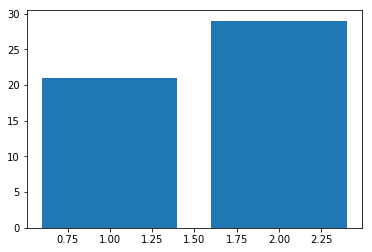

In [2]:
Head=(toss==1).sum()
Tail=(toss==0).sum()

print("Number of Heads:{} Tails:{}".format(Head,Tail))

plt.figure(1)
plt.bar([1,2],[Head,Tail],)
plt.show()


## &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; So! Is the Coin Biasesd?

In [1]:
#import theano as t
import pymc3 as pm

In [45]:
with pm.Model() as coin_toss:
    #Declaring Uniform prior. 
    prior=pm.Uniform('prior',0,1)
    #Refer(https://docs.pymc.io/api/distributions/continuous.html)
    
    #Specify the likelihood as a Bernoulli
    likelihood=pm.Bernoulli('likelihood',p=prior,observed=toss)
    # Observed is the data we have
    
    
    

In [46]:
map_estimate = pm.find_MAP(model=coin_toss)

map_estimate

logp = -34.657, ||grad|| = 1: 100%|██████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.05it/s]


{'prior': array(0.52), 'prior_interval__': array(0.08004271)}

In [47]:
with coin_toss:
    step=pm.Metropolis()
    coin_trace=pm.sample(1000,step=step)

100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 8875.01it/s]


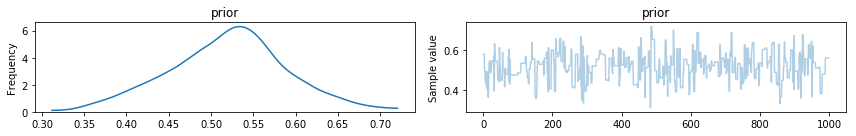

In [48]:
pm.traceplot(coin_trace)
plt.show()

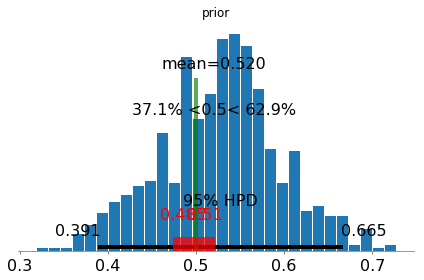

In [49]:
pm.plot_posterior(coin_trace,point_estimate='mean',ref_val=0.5,rope=[0.485,0.51])
plt.show()

### Inference
    - Mean=0.37 (Changes on different run)
    - 94% of the time P value will lie between0.487 and 0.75
    - From our prior beleif, we know it should be around 0.5.
    

** We Need More Data! As simple As that **

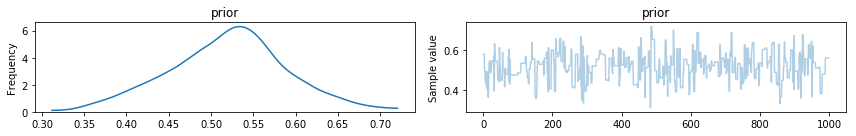

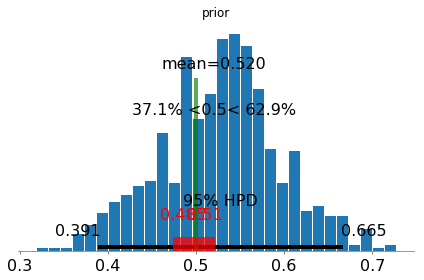

In [50]:
pm.traceplot(coin_trace)
plt.show()

pm.plot_posterior(coin_trace,point_estimate='mean',ref_val=0.5,rope=[0.485,0.51])
plt.show()


## Example 2: Linear Regression ( Bayesian!)


<img src="1.png" alt="My Image">

    - Where X (1...D).T is the Data Point Observations
    - W0....Wd are the Parameters

In [51]:
# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2


# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

Now,<br>
** Model Specification **

In [52]:
with pm.Model() as our_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)  #What happens if i change this to Normal

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

** Model Fitting **

- Next Step is to Obtain Posterior Dist. of the Unknown Variables
- We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: 
    - 1) MAP Approach
    - 2) MCMC Sampling based Approach

In [53]:
map_estimate = pm.find_MAP(model=our_model)

map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|█████████████████████████████████████████████| 19/19 [00:00<00:00, 1115.35it/s]


{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma': array(0.96298858),
 'sigma_log__': array(-0.03771373)}

##### MAP- Not Always Reasonable

- Whenever the Mode of the distribution is at an extreme point, this is a problem then.
  <br>
- with high dimensional posteriors, one can have areas of extremely high density but low total probability because the volume is very small.
- Happens in hierarchical data.

### Sampling Based Approach

<img src="s1.png" alt="My Image">

In [57]:

with our_model:
    # draw 5000 posterior samples
    step = pm.Slice() # Check with other kind of steps 
    trace = pm.sample(5000,step=step)

100%|█████████████████████████████████████████████████████████████████████████████| 5500/5500 [00:08<00:00, 679.60it/s]


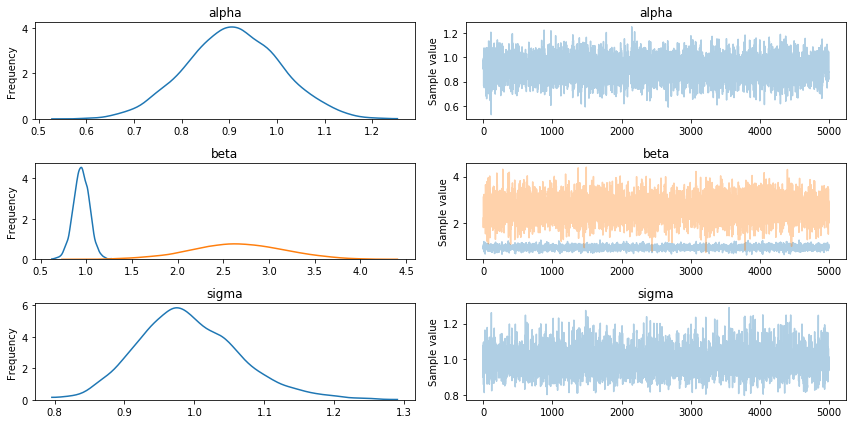

In [58]:
pm.traceplot(trace)
plt.show()

In [173]:
pm.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.906            0.097            0.001            [0.713, 1.089]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.717          0.840          0.908          0.970          1.093


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.947            0.088            0.001            [0.782, 1.125]
  2.601            0.517            0.006            [1.573, 3.605]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.775          0.889          0.947          1.008          1.120
  1.579          2.260          2.598   

# Case Studies
## 1. Coal Mining Disaster


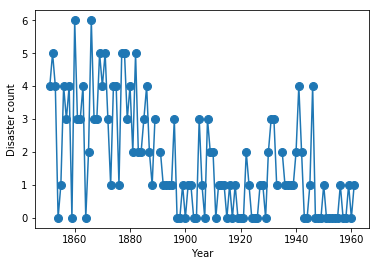

In [8]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, '-o', markersize=8)
plt.ylabel("Disaster count")
plt.xlabel("Year")
plt.show()

** Statement **
<br>
Occurrences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in the later part. We are interested in locating the change point in the series, which perhaps is related to changes in mining safety regulations.

\begin{split}\begin{aligned}
  D_t &\sim \text{Pois}(r_t), r_t= \begin{cases}
   l, & \text{if } t \lt s \\
   e, & \text{if } t \ge s
   \end{cases} \\
  s &\sim \text{Unif}(t_l, t_h)\\
  e &\sim \text{exp}(1)\\
  l &\sim \text{exp}(1)
\end{aligned}\end{split}

\begin{aligned}
D_t = \ The number of disasters in year t
\end{aligned}

\begin{aligned}
r_t = \ The rate of Parameter
\end{aligned}

\begin{aligned}
S = \ Switchpoint
\end{aligned}

### Creation of Model

    * Declaring the Prior
    * Drawing the samples
    * Traceplot

In [32]:
with pm.Model() as disaster_model:
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    #-----------------------
    # if (Switchpoint>=year)
    # {early_rate}
    #else
    #{late_rate}
    #-----------------------
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

In [35]:
with disaster_model:
    step=pm.Metropolis()
    trace = pm.sample(10000,step=step)

100%|██████████████████████████████████████████████████████████████████████████| 10500/10500 [00:07<00:00, 1413.96it/s]


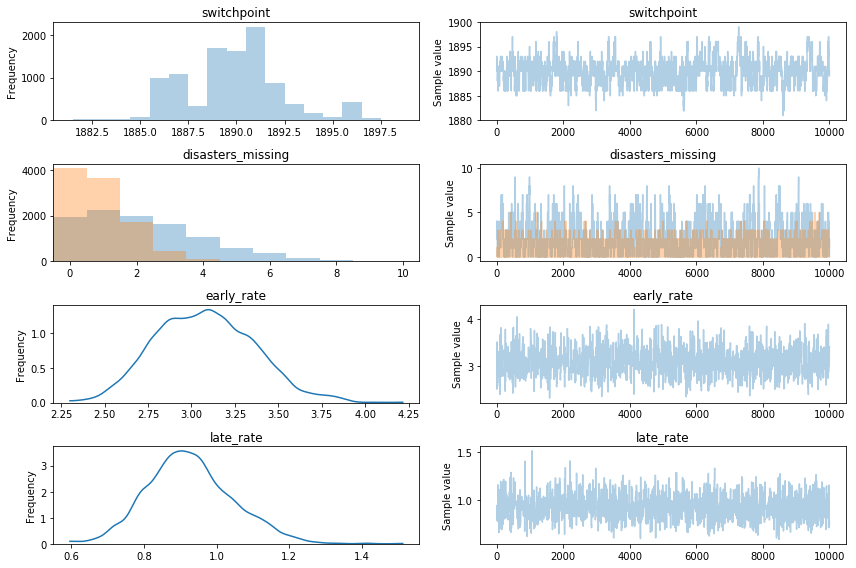

In [36]:
pm.traceplot(trace)
plt.show()


## Example 2: Seeds Random Effect Logistic Regression

<img src="sde1.png" alt="My Image">

<img src="sde2.png" alt="My Image">

<img src="sdee3.png" alt="My Image">

In [60]:

### data   ### dat 
# germinated seeds
r =  np.array([10, 23, 23, 26, 17, 5, 53, 55, 32, 46, 10, 8, 10, 8, 23, 0, 3, 22, 15, 32, 3])

# total seeds
n =  np.array([39, 62, 81, 51, 39, 6, 74, 72, 51, 79, 13, 16, 30, 28, 45, 4, 12, 41, 30, 51, 7])

# seed type
x1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# root type
x2 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# number of plates
N =  x1.shape[0]

### Observations from the model
<br>
- alpha0,alpha1,alpha2,alpha12,tau is independent of any other param
- Sigma, r, b are dependent on any other parameter
- aplha0,alpha1,alph2,alpha12 have fixed ecffects
- tau and sigma are Hyperpriors
- b has random effects

** Expectation **
<br>
logit_p =  (alpha0 + alpha1 .x1 + alpha2. x2 + alpha12. x1. x2 + b)
    
 

### Model Creation

In [64]:
import theano.tensor as T

In [95]:
with pm.Model() as seeds:
    
    
    
    alpha0 = pm.Normal('alpha0', 0.,1e-6)
    alpha1 = pm.Normal('alpha1', 0.,1e-6) 
    alpha2 = pm.Normal('alpha2', 0.,1e-6) 
    alpha12 = pm.Normal('alpha12', 0.,1e-6)  
    
    tau = pm.Gamma('tau', 0.001,0.001)
    sigma = 1/np.sqrt(tau)
    
    
    b = pm.Normal('b', 0., tau,  shape=(N,))
    
    # expected parameter
    logit_p =  (alpha0 + alpha1*x1 + alpha2*x2 + alpha12*x1*x2 + b)
    p = T.exp(logit_p) / (1 + T.exp(logit_p))
    
    ### likelihood
    obs = pm.Binomial('obs', n, p, observed=r)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\UDDIPTA\AppData\Local\Theano\compiledir_Windows-10-10.0.17134-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.4-64\lock_dir\lock


In [96]:
with seeds:
    start = pm.find_MAP({'tau': 10., 'alpha0': 0., 'alpha1': 0., 'alpha2': 0., 'alpha12': 0., 'b': np.zeros(N)})
    step = pm.HamiltonianMC(scaling=start)
    
    ptrace = pm.sample(2000, step, start, progressbar=False, threads=4)

logp = -179.23, ||grad|| = 809.55: 100%|██████████████████████████████████████████████| 35/35 [00:00<00:00, 594.81it/s]
C:\Users\UDDIPTA\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):


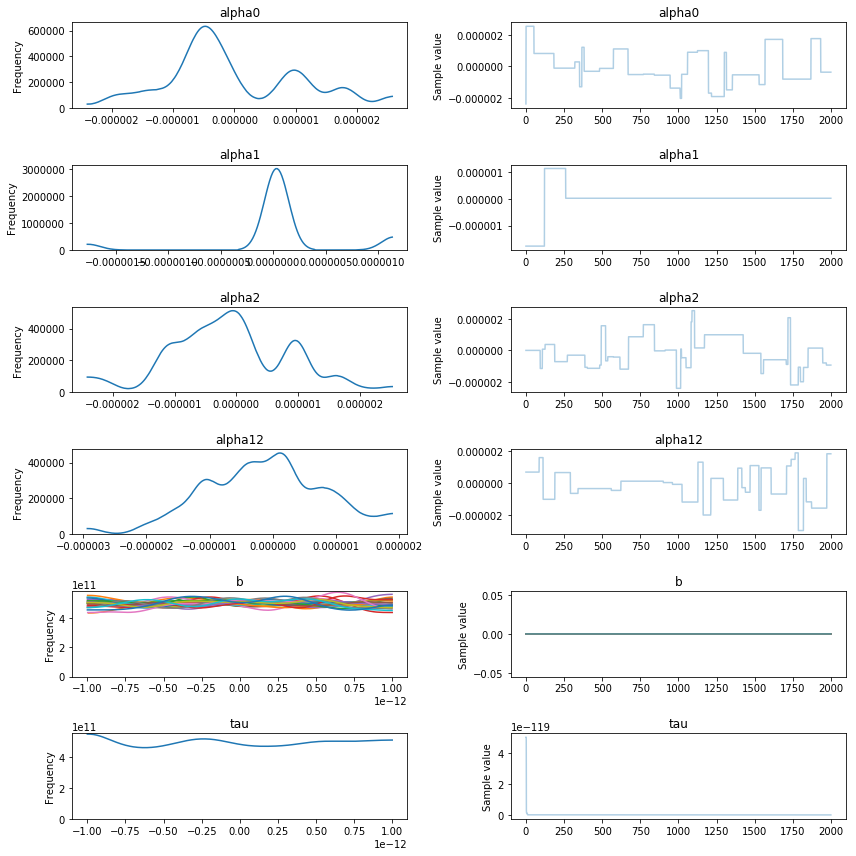

In [85]:
pm.traceplot(ptrace)
plt.show()

In [97]:
pm.summary(ptrace)


alpha0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.000           0.000            0.000            [-0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.000         -0.000         -0.000         0.000          0.000


alpha1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.000           0.000            0.000            [-0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.000         -0.000         0.000          0.000          0.000


alpha2:

  Mean             SD               MC Error         95% HPD interval
  --------------------

In [86]:
burn = 1000
pm.summary(ptrace[burn:])


alpha0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.000           0.000            0.000            [-0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.000         -0.000         -0.000         0.000          0.000


alpha1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.000            0.000            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.000


alpha2:

  Mean             SD               MC Error         95% HPD interval
  ---------------------

In [89]:
with pm.Model() as m:
    ### hyperpriors
    tau = pm.Gamma('tau', 1.e-3, 1.e-3)
    sigma = tau**-.5
    
    ### parameters
    # fixed effects
    alpha_0 = pm.Normal('alpha_0', 0., 1e-6)
    alpha_1 = pm.Normal('alpha_1', 0., 1e-6) 
    alpha_2 = pm.Normal('alpha_2', 0., 1e-6) 
    alpha_12 = pm.Normal('alpha_12', 0., 1e-6)  
    
    # random effect
    b = pm.Normal('b', 0., tau,  shape=(N,))
    
    # expected parameter
    logit_p =  (alpha_0 + alpha_1*x1 + alpha_2*x2 + alpha_12*x1*x2 + b)
    p = T.exp(logit_p) / (1 + T.exp(logit_p))
    
    ### likelihood
    obs = pm.Binomial('obs', n, p, observed=r)

In [93]:
n = 2000

with m:
    #start = pm.find_MAP({'tau': 10., 'alpha_0': 0., 'alpha_1': 0., 'alpha_2': 0., 'alpha_12': 0., 'b': np.zeros(N)})
    step = pm.HamiltonianMC(scaling=start)
    
    ptrace = pm.sample(n, step,  progressbar=False, threads=4)

C:\Users\UDDIPTA\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):


In [94]:
burn = 1000
pm.summary(ptrace[burn:])


alpha_0:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.000            0.000            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.000


alpha_1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.000            0.000            0.000            [0.000, 0.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          0.000          0.000          0.000


alpha_2:

  Mean             SD               MC Error         95% HPD interval
  -------------------

### This Notebook is in initial Stage. Will be updated soon.